In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('marketing_campaign/marketing_campaign.csv', sep=';')

In [3]:
df.loc[df["Response"]==1, :]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,...,3,0,0,1,1,0,0,3,11,1
33,7373,1952,PhD,Divorced,46610.0,0,2,2012-10-29,8,96,...,6,0,0,0,0,0,0,3,11,1
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,...,6,1,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,6,1,0,0,0,0,0,3,11,1
2198,2632,1954,Graduation,Married,50501.0,1,1,2013-06-18,10,297,...,6,1,0,0,0,0,0,3,11,1
2202,11133,1973,PhD,YOLO,48432.0,0,1,2012-10-18,3,322,...,8,0,0,0,0,0,0,3,11,1
2221,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,...,1,0,1,1,0,0,0,3,11,1


In [4]:
print(df.loc[15, :].to_json())

{"ID":2114,"Year_Birth":1946,"Education":"PhD","Marital_Status":"Single","Income":82800.0,"Kidhome":0,"Teenhome":0,"Dt_Customer":"2012-11-24","Recency":23,"MntWines":1006,"MntFruits":22,"MntMeatProducts":115,"MntFishProducts":59,"MntSweetProducts":68,"MntGoldProds":45,"NumDealsPurchases":1,"NumWebPurchases":7,"NumCatalogPurchases":6,"NumStorePurchases":12,"NumWebVisitsMonth":3,"AcceptedCmp3":0,"AcceptedCmp4":0,"AcceptedCmp5":1,"AcceptedCmp1":1,"AcceptedCmp2":0,"Complain":0,"Z_CostContact":3,"Z_Revenue":11,"Response":1}


In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
# AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
# AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
# AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
# Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
# Complain - 1 if customer complained in the last 2 years
# DtCustomer - date of customer’s enrolment with the company
# Education - customer’s level of education
# Marital - customer’s marital status
# Kidhome - number of small children in customer’s household
# Teenhome - number of teenagers in customer’s household
# Income - customer’s yearly household income
# MntFishProducts - amount spent on fish products in the last 2 years
# MntMeatProducts - amount spent on meat products in the last 2 years
# MntFruits - amount spent on fruits products in the last 2 years
# MntSweetProducts - amount spent on sweet products in the last 2 years
# MntWines - amount spent on wine products in the last 2 years
# MntGoldProds - amount spent on gold products in the last 2 years
# NumDealsPurchases - number of purchases made with discount
# NumCatalogPurchases - number of purchases made using catalogue
# NumStorePurchases - number of purchases made directly in stores
# NumWebPurchases - number of purchases made through company’s web site
# NumWebVisitsMonth - number of visits to company’s web site in the last month
# Recency - number of days since the last purchase

In [8]:
df.loc[:, 'Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [9]:
df.head()
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [10]:
df['day'] = df.loc[:, 'Dt_Customer'].dt.day
df['month'] = df.loc[:, 'Dt_Customer'].dt.month
df['year'] = df.loc[:, 'Dt_Customer'].dt.year

In [11]:
df.drop(['Dt_Customer'], axis=1, inplace=True)

/tmp/ipykernel_9469/1038882853.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


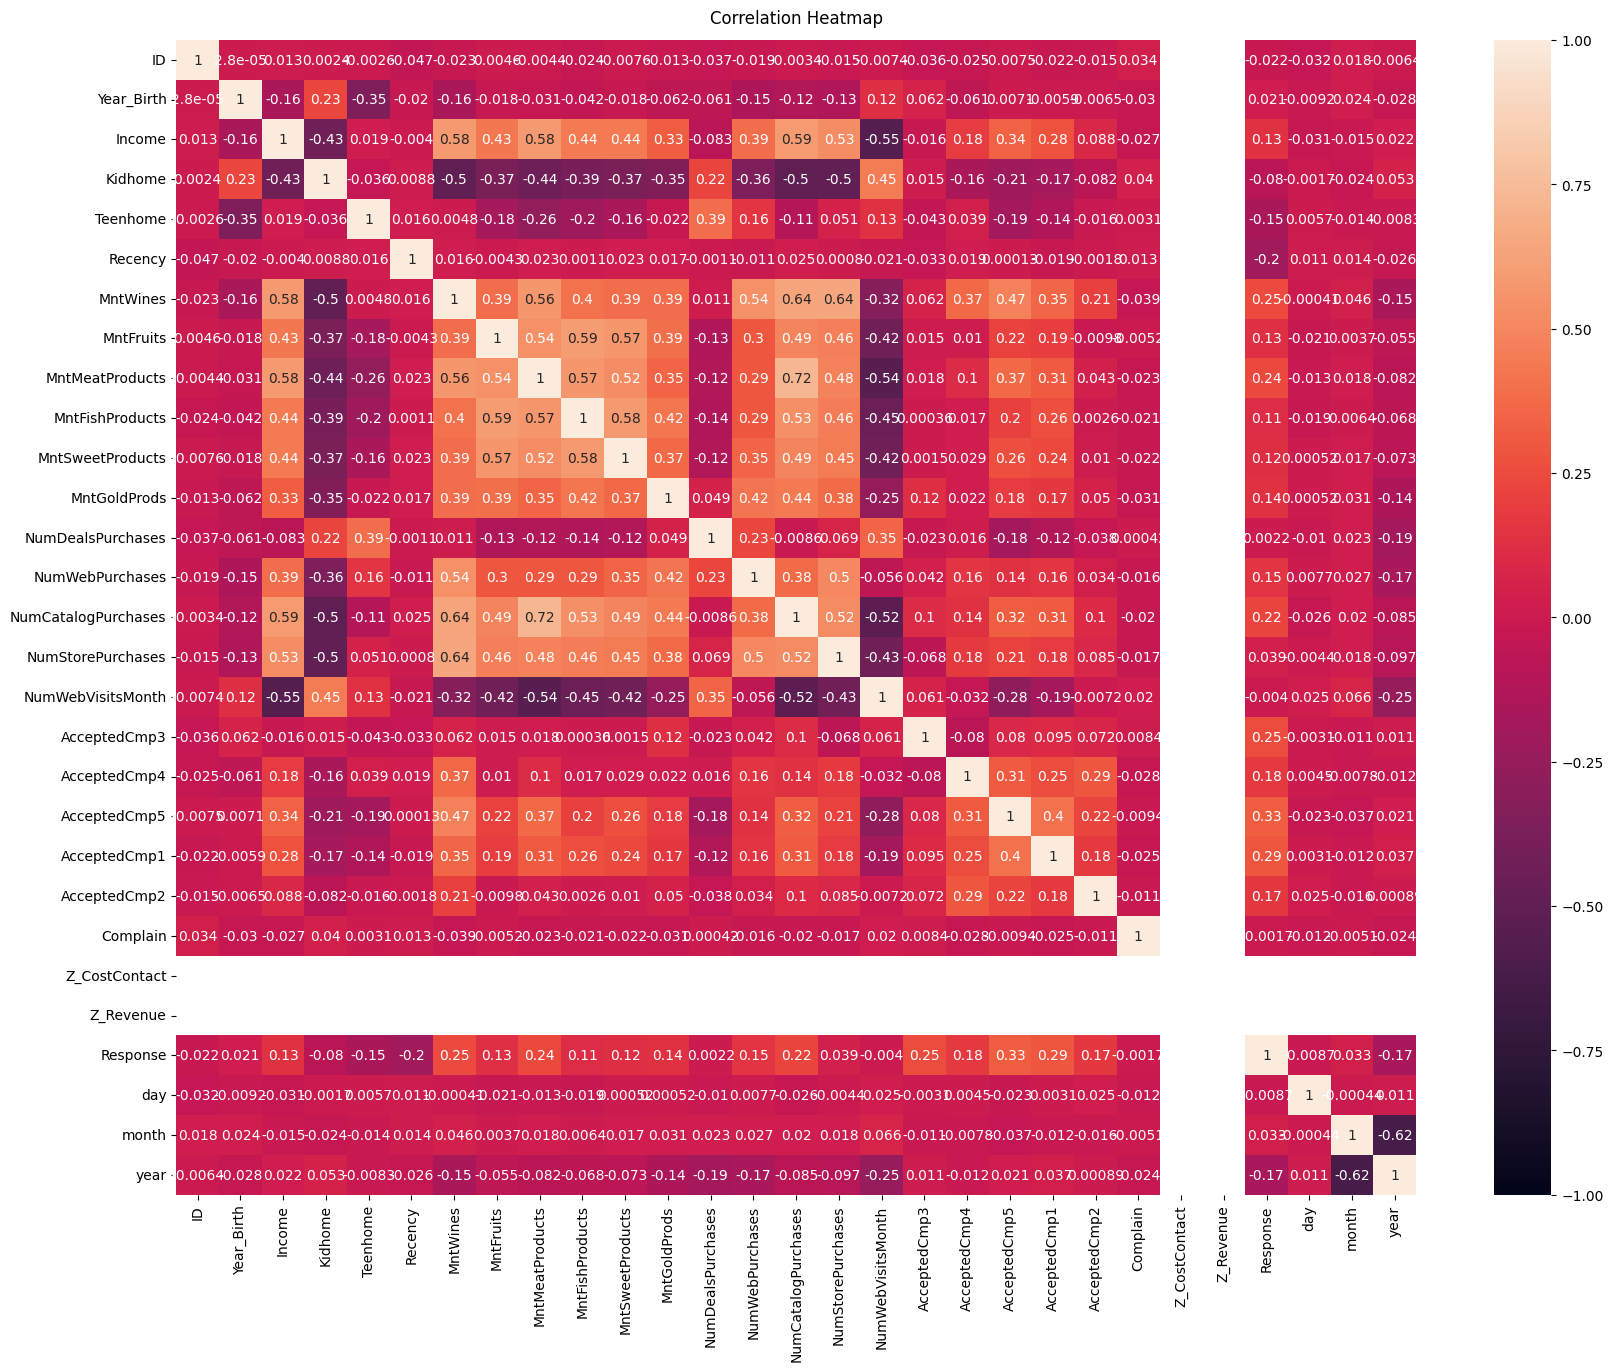

In [12]:
corr_matrix = df.corr()

plt.figure(figsize=(20, 15))

heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [13]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
day                     0
month                   0
year                    0
dtype: int64

In [14]:
df.loc[df['Income'].isnull(), "Income"]

10     NaN
27     NaN
43     NaN
48     NaN
58     NaN
71     NaN
90     NaN
91     NaN
92     NaN
128    NaN
133    NaN
312    NaN
319    NaN
1379   NaN
1382   NaN
1383   NaN
1386   NaN
2059   NaN
2061   NaN
2078   NaN
2079   NaN
2081   NaN
2084   NaN
2228   NaN
Name: Income, dtype: float64

In [24]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'day', 'month',
       'year'],
      dtype='object')

In [21]:
column_trans = ColumnTransformer(
[('imp_col1', SimpleImputer(strategy='mean', missing_values= np.nan), ['Income']),
 ('imp_col2', SimpleImputer(strategy='median', missing_values= np.nan), ['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'day', 'month', 'year']),
    ('imp_col3', SimpleImputer(strategy='most_frequent', missing_values= np.nan), ['Education', 'Marital_Status'])], remainder='passthrough')


In [22]:
column_trans.fit(df)
X = column_trans.transform(df)
df3 = pd.DataFrame(df, columns=['Income', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue',
       'day', 'month', 'year', 'Education', 'Marital_Status', 'Response'])

In [23]:
# Save imputer to pickle file
pickle.dump(column_trans, open('imputer.pkl', 'wb'))

In [256]:
# Encoding categorical features
le = LabelEncoder()

for col in df.select_dtypes(include='O').columns:
    df3[col] = le.fit_transform(df3[col])
    
    
# Save the encoder to a picle file
pickle.dump(le, open('encoder.pkl', 'wb'))

In [257]:
df3.describe()


,Income,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,day,month,year,Education,Marital_Status,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.013393,0.009375,3.0,11.0,15.638393,6.467411,2013.028125,2.393750,3.729911,0.149107
std,25037.797168,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.114976,0.096391,0.0,0.0,8.790680,3.486695,0.684554,1.124797,1.076277,0.356274
min,1730.000000,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.0,11.0,1.000000,1.000000,2012.000000,0.000000,0.000000,0.000000
25%,35538.750000,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,3.0,11.0,8.000000,3.000000,2013.000000,2.000000,3.000000,0.000000
50%,51741.500000,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,3.0,11.0,16.000000,6.000000,2013.000000,2.000000,4.000000,0.000000
75%,68289.750000,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,3.0,11.0,23.000000,10.000000,2013.000000,3.000000,5.000000,0.000000
max,666666.000000,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,3.0,11.0,31.000000,12.000000,2014.000000,4.000000,7.000000,1.000000


In [258]:
df3['Years_Old'] = df3['Year_Birth'].map(lambda x: (int(2023) - int(x)))


([<matplotlib.axis.XTick at 0x7fdb1efd58a0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

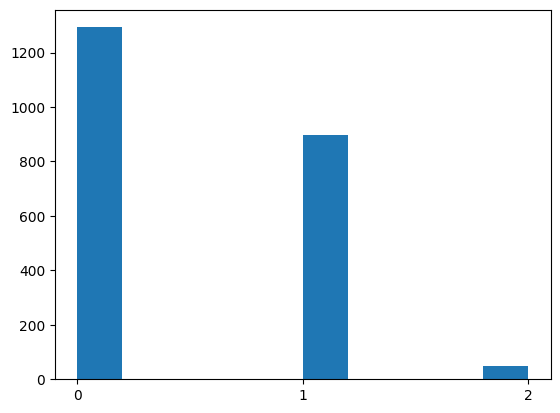

In [259]:
plt.hist(df3['Kidhome'])
plt.xticks([0, 1, 2])

([<matplotlib.axis.XTick at 0x7fdb1edd2920>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

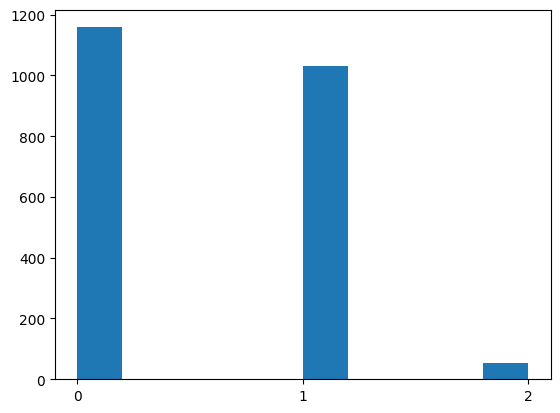

In [260]:
plt.hist(df3['Teenhome'])
plt.xticks([0, 1, 2])

In [261]:
df3['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

<AxesSubplot: xlabel='Response', ylabel='Recency'>

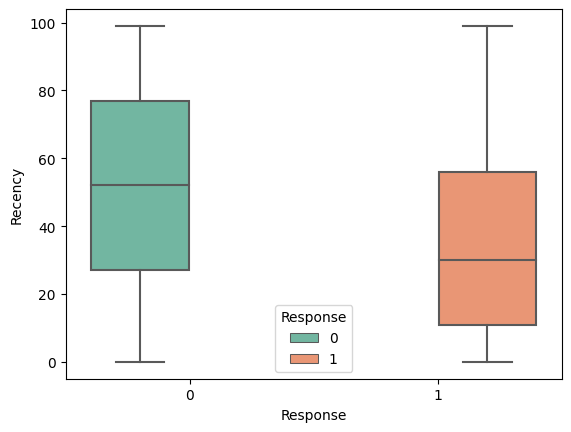

In [262]:
# create another grouped boxplot 
sns.boxplot(x = df3['Response'],
            y = df3['Recency'],
            hue = df3['Response'],
            palette = 'Set2')

<AxesSubplot: xlabel='Response', ylabel='MntWines'>

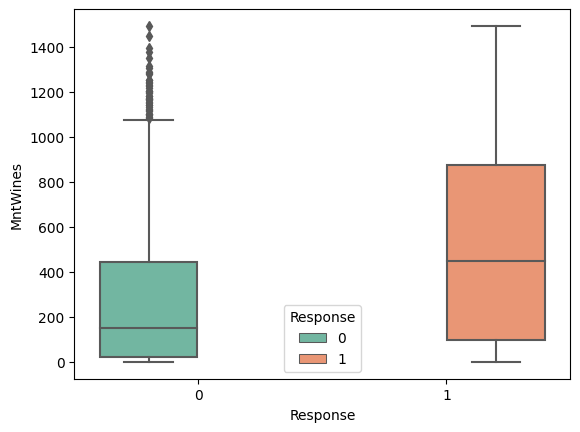

In [263]:
# create another grouped boxplot 
sns.boxplot(x = df3['Response'],
            y = df3['MntWines'],
            hue = df3['Response'],
            palette = 'Set2')

<AxesSubplot: xlabel='Response', ylabel='MntFruits'>

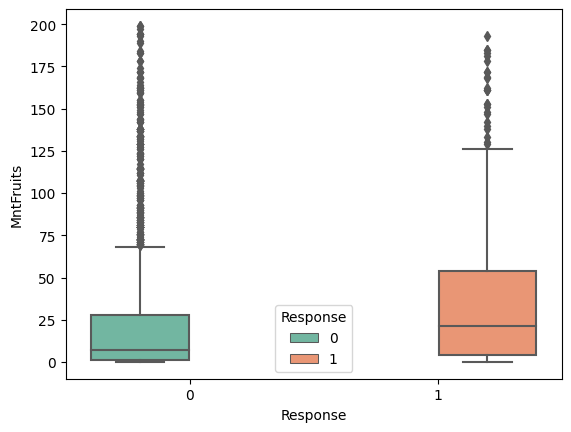

In [264]:
# create another grouped boxplot 
sns.boxplot(x = df3['Response'],
            y = df3['MntFruits'],
            hue = df3['Response'],
            palette = 'Set2')

<AxesSubplot: xlabel='Response', ylabel='MntFishProducts'>

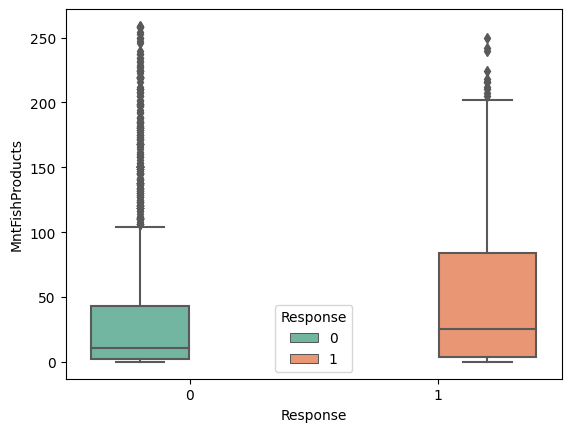

In [265]:
# create another grouped boxplot 
sns.boxplot(x = df3['Response'],
            y = df3['MntFishProducts'],
            hue = df3['Response'],
            palette = 'Set2')

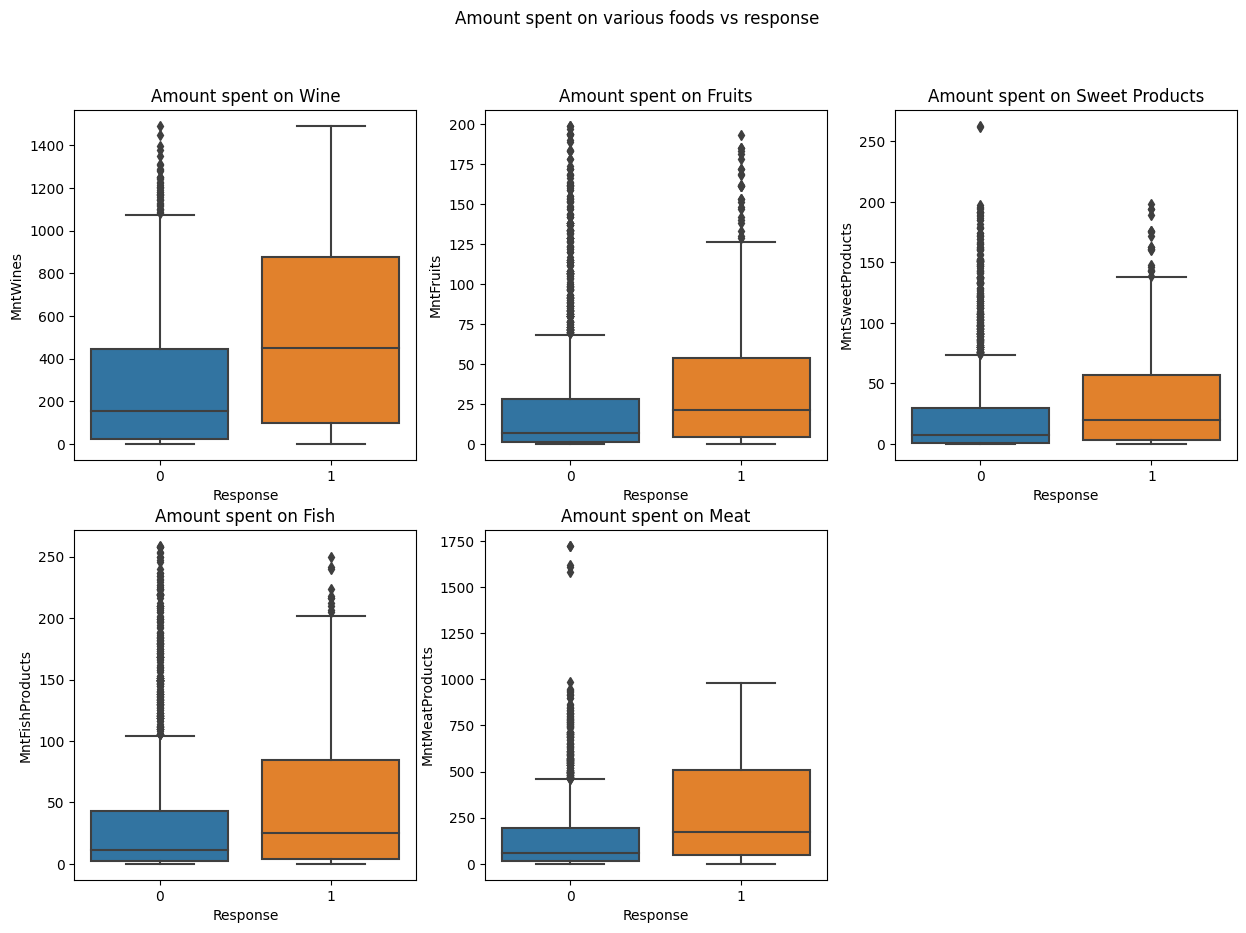

In [266]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Amount spent on various foods vs response')

sns.boxplot(ax=axes[0,0], x=df3['Response'], y=df3['MntWines'])
axes[0,0].set_title('Amount spent on Wine')

sns.boxplot(ax=axes[0,1], x=df3['Response'], y=df3['MntFruits'])
axes[0,1].set_title('Amount spent on Fruits')

sns.boxplot(ax=axes[0,2], x=df3['Response'], y=df3['MntSweetProducts'])
axes[0, 2].set_title('Amount spent on Sweet Products')

sns.boxplot(ax=axes[1,0], x=df3['Response'], y=df3['MntFishProducts'])
axes[1,0].set_title('Amount spent on Fish')

sns.boxplot(ax=axes[1,1], x=df3['Response'], y=df3['MntMeatProducts'])
axes[1,1].set_title('Amount spent on Meat')

fig.delaxes(axes[1,2]) 

<AxesSubplot: xlabel='Response', ylabel='MntGoldProds'>

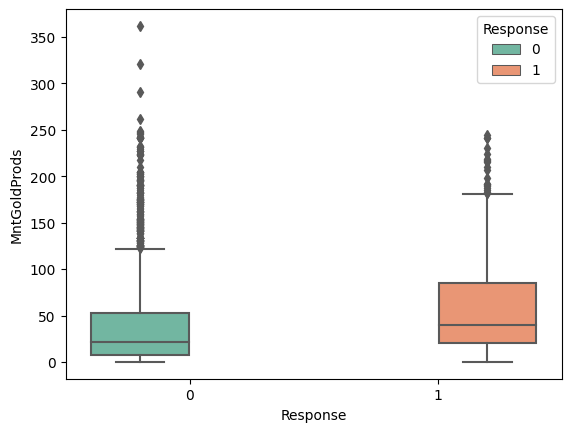

In [267]:
# MntGoldProds - amount spent on gold products in the last 2 years
sns.boxplot(x = df3['Response'],
            y = df3['MntGoldProds'],
            hue = df3['Response'],
            palette = 'Set2')

<AxesSubplot: xlabel='Response', ylabel='Income'>

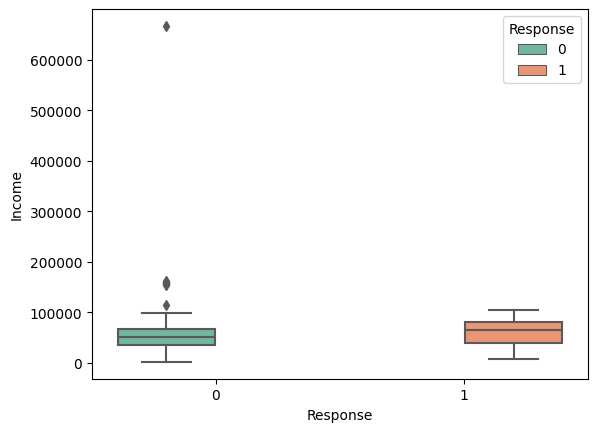

In [268]:
# MntGoldProds - amount spent on gold products in the last 2 years
sns.boxplot(x = df3['Response'],
            y = df3['Income'],
            hue = df3['Response'],
            palette = 'Set2')

In [269]:
df3.columns

Index(['Income', 'ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'day', 'month', 'year', 'Education', 'Marital_Status',
       'Response', 'Years_Old'],
      dtype='object')

In [270]:
df3.groupby('Response').mean().loc[:, ['Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth']]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Response,,,,,,,,,,,,,,,
0,50856.124754,0.462225,0.541448,51.514690,269.104407,24.216684,144.624344,34.980063,25.035152,40.968520,2.323190,3.911857,2.391920,5.736621,5.320567
1,60185.836082,0.341317,0.305389,35.383234,502.703593,38.203593,294.353293,52.050898,38.634731,61.446108,2.335329,5.071856,4.203593,6.095808,5.293413


In [271]:
df3.groupby('Response').mean().loc[:, ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Complain', 'Z_CostContact',
       'Z_Revenue', 'Years_Old']]

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Years_Old
Response,,,,,,,,,
0,0.034103,0.005247,0.045121,0.055089,0.037251,0.009444,3.0,11.0,54.301154
1,0.236527,0.059880,0.230539,0.185629,0.275449,0.008982,3.0,11.0,53.583832


Text(0.5, 1.0, 'Purchases made through company’s web site')

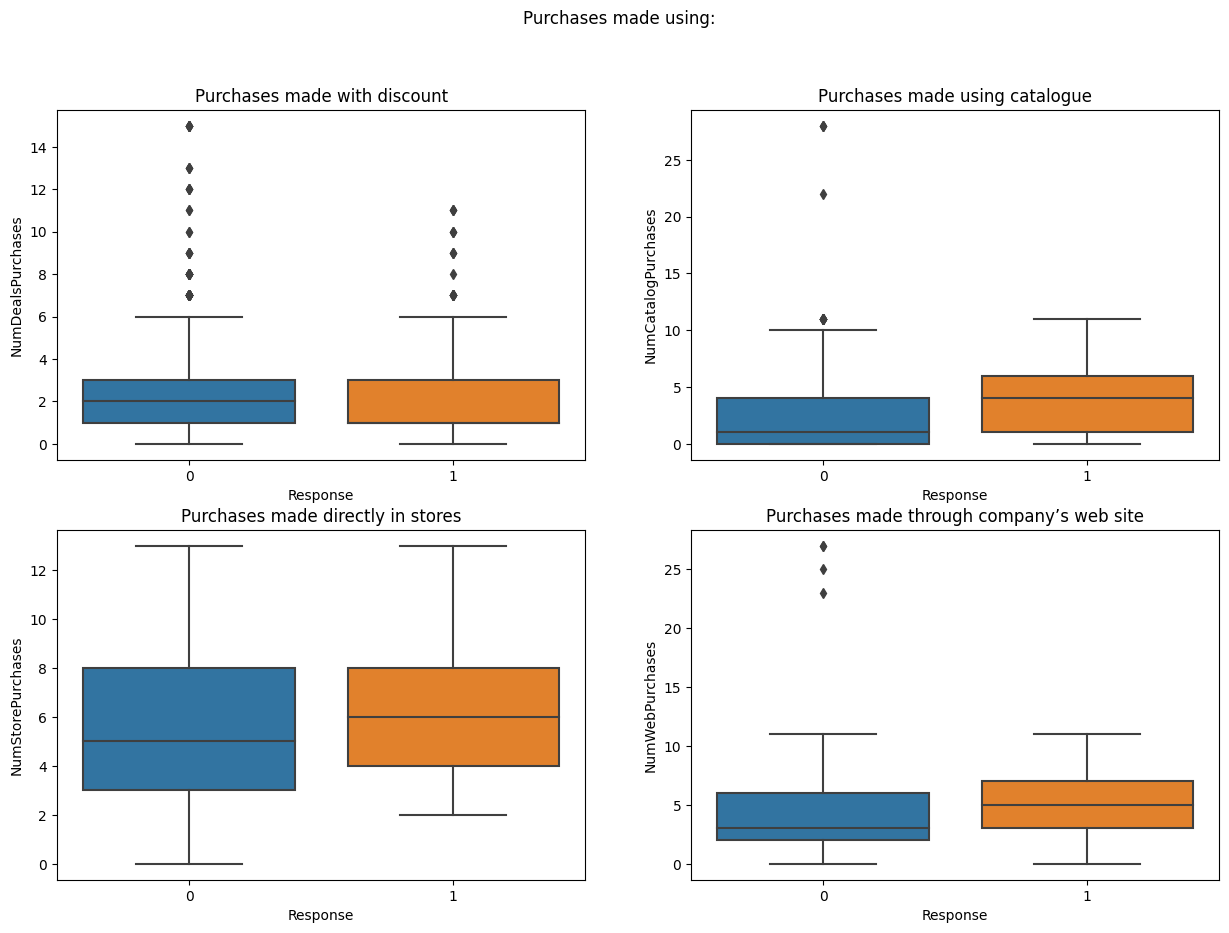

In [272]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Purchases made using:')

sns.boxplot(ax=axes[0,0], x=df3['Response'], y=df3['NumDealsPurchases'])
axes[0,0].set_title('Purchases made with discount')

# NumCatalogPurchases - number of purchases made using catalogue
sns.boxplot(ax=axes[0,1], x=df3['Response'], y=df3['NumCatalogPurchases'])
axes[0,1].set_title('Purchases made using catalogue')

# NumStorePurchases - number of purchases made directly in stores
sns.boxplot(ax=axes[1,0], x=df3['Response'], y=df3['NumStorePurchases'])
axes[1,0].set_title('Purchases made directly in stores')

# NumWebPurchases - number of purchases made through company’s web site
sns.boxplot(ax=axes[1,1], x=df3['Response'], y=df3['NumWebPurchases'])
axes[1,1].set_title('Purchases made through company’s web site')


<AxesSubplot: xlabel='Response', ylabel='NumWebVisitsMonth'>

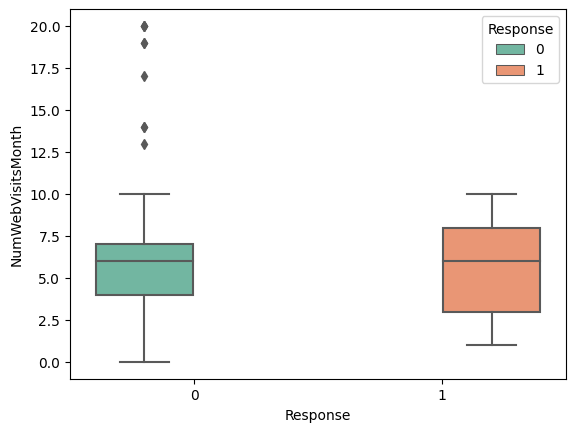

In [273]:
# NumWebVisitsMonth - number of visits to company’s web site in the last month
sns.boxplot(x = df3['Response'],
            y = df3['NumWebVisitsMonth'],
            hue = df3['Response'],
            palette = 'Set2')

In [274]:
X = df3.drop(['Response'], axis=1)
y = df3.loc[: ,'Response']

# Random Forest Importances

In [275]:
model = RandomForestClassifier(n_estimators=300)

#fit the model
model.fit(X, y)

#get the importances
importances=model.feature_importances_

In [276]:
#visualize the results
results = pd.DataFrame({"Features": X.columns, 'Importances': importances})

# set importances as index
results.set_index('Importances')

# sort importances
results =  results.sort_values("Importances")

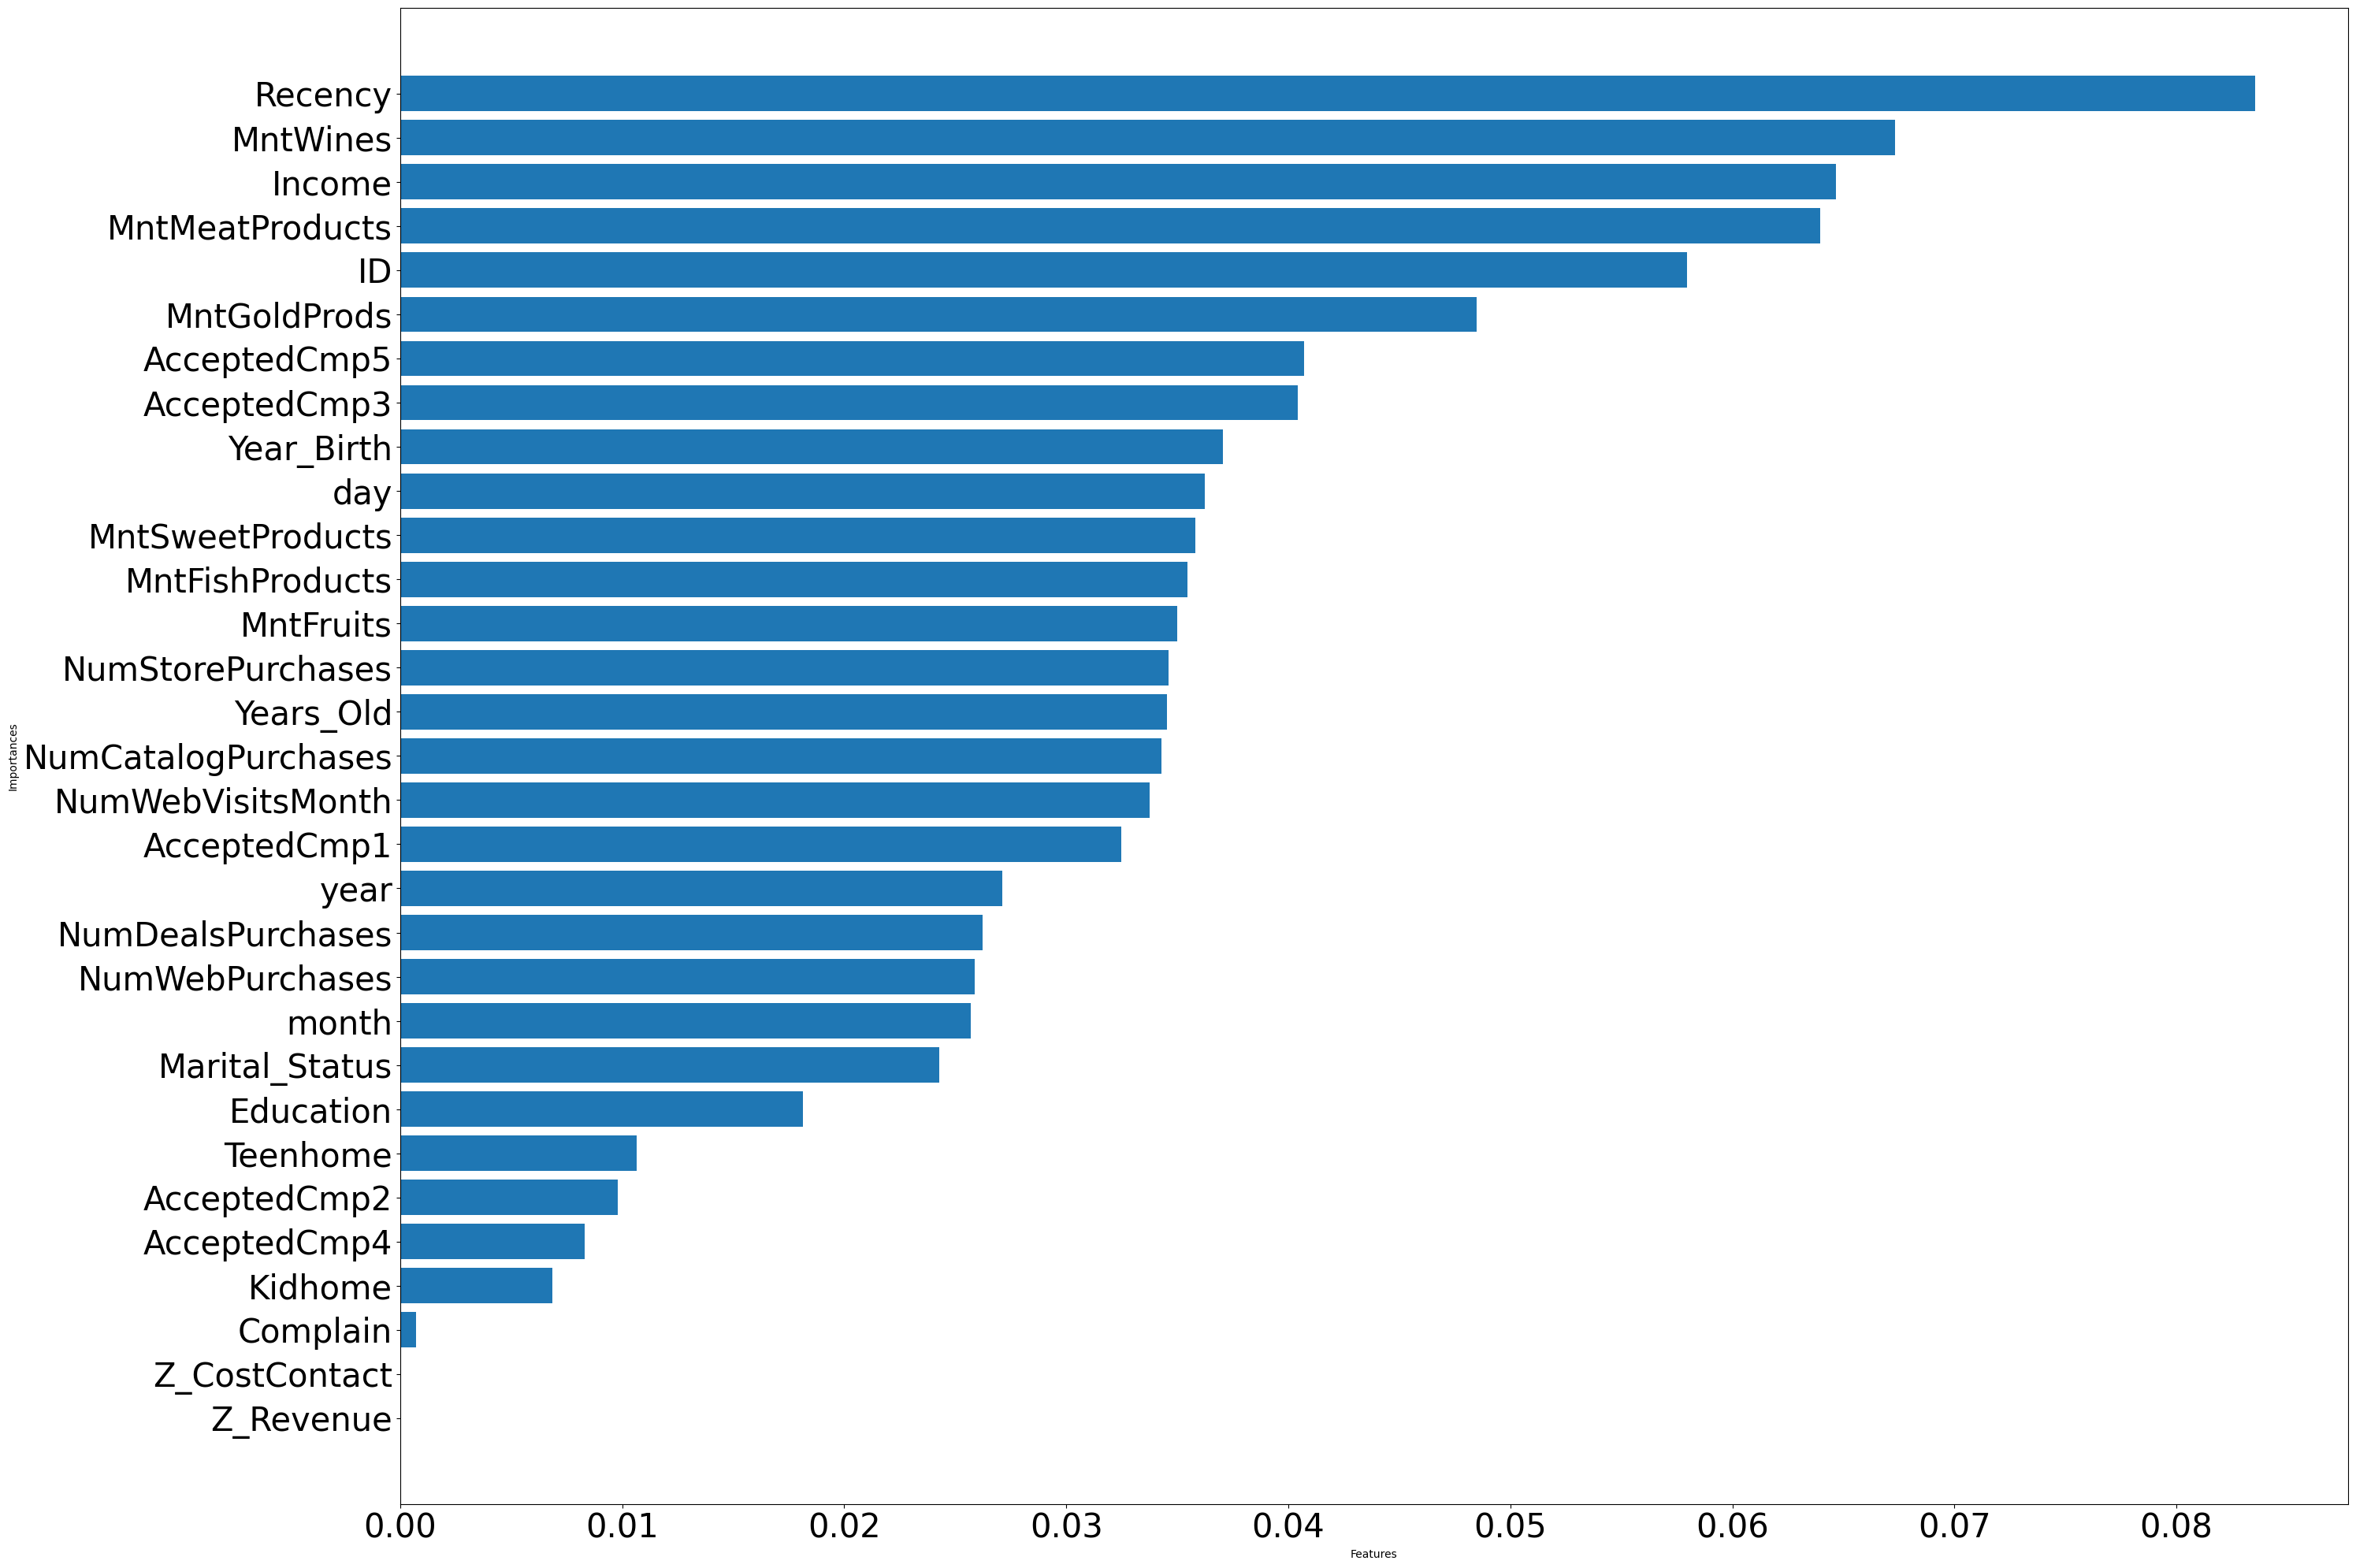

In [277]:
# plot the features and importances
plt.figure(figsize=(30, 20))
plt.barh(results['Features'], results['Importances'])
plt.xlabel("Features")
plt.ylabel('Importances')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [280]:
# Save the model to a picle file
pickle.dump(sc, open('scaler.pkl', 'wb'))

# Random Forrest model

In [281]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

preds = rf.predict(X_test)

In [282]:
accuracy = accuracy_score(y_test, preds)

print(f"Accuracy of a Random Forest : {accuracy}")

Accuracy of a Random Forest : 0.8660714285714286


In [292]:
# Lists of hyperparameters for GridSearch

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 3)] 

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [2,4,6,8,10,12]

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [293]:
finder = GridSearchCV(
    estimator=rf,
    param_grid=params,
    scoring='accuracy',
    verbose=3,
    return_train_score=True
)

In [294]:
finder.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.853, test=0.852) total time=   0.1s
[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.857, test=0.852) total time=   0.1s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.857, test=0.852) total time=   0.1s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.860, test=0.863) total time=   0.1s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.861, test=0.855) total time=   0.1s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=275;, score=(train=0.860, test=0.855) total time=   0.4s
[CV 2

[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=275;, score=(train=0.854, test=0.858) total time=   0.4s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=275;, score=(train=0.857, test=0.852) total time=   0.4s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.864, test=0.855) total time=   0.7s
[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.858, test=0.858) total time=   0.7s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.863, test=0.858) total time=   0.6s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.854, test=0.858) total time=   0.6s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1,

[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.868, test=0.855) total time=   0.1s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.858, test=0.855) total time=   0.1s
[CV 5/5] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.858, test=0.852) total time=   0.1s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.871, test=0.866) total time=   0.4s
[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.859, test=0.858) total time=   0.4s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.858, test=0.855) total time=   0.4s
[CV 4/5] END max_depth=2, max_features=sqrt, min_samples_leaf=2, mi

[CV 1/5] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.857, test=0.855) total time=   0.7s
[CV 2/5] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.854, test=0.852) total time=   0.7s
[CV 3/5] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.854, test=0.852) total time=   0.6s
[CV 4/5] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.853, test=0.855) total time=   0.6s
[CV 5/5] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.852, test=0.852) total time=   0.6s
[CV 1/5] END max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.859, test=0.855) total time=   0.1s
[CV 2/5] END max_depth=2, max_features=log2, min_samples_leaf=1, 

[CV 1/5] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.855, test=0.852) total time=   0.4s
[CV 2/5] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.853, test=0.852) total time=   0.4s
[CV 3/5] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.858, test=0.855) total time=   0.4s
[CV 4/5] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.853, test=0.855) total time=   0.4s
[CV 5/5] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.854, test=0.852) total time=   0.4s
[CV 1/5] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=500;, score=(train=0.854, test=0.852) total time=   0.7s
[CV 2/5] END max_depth=2, max_features=log2, min_samples_leaf=2,

[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=(train=0.883, test=0.866) total time=   0.8s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=(train=0.882, test=0.869) total time=   0.8s
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.890, test=0.866) total time=   0.1s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.886, test=0.872) total time=   0.1s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.884, test=0.866) total time=   0.1s
[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.885, test=0.874) total time=   0.1s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_leaf=1, min

[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.881, test=0.875) total time=   0.5s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.887, test=0.869) total time=   0.5s
[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.884, test=0.874) total time=   0.4s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.881, test=0.872) total time=   0.4s
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=(train=0.888, test=0.869) total time=   0.8s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=(train=0.879, test=0.875) total time=   0.8s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_leaf=2,

[CV 5/5] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=(train=0.880, test=0.866) total time=   0.7s
[CV 1/5] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.890, test=0.872) total time=   0.1s
[CV 2/5] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.881, test=0.869) total time=   0.1s
[CV 3/5] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.884, test=0.860) total time=   0.1s
[CV 4/5] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.882, test=0.874) total time=   0.1s
[CV 5/5] END max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.885, test=0.872) total time=   0.1s
[CV 1/5] END max_depth=4, max_features=log2, min_samples_leaf=1, min_

[CV 3/5] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.883, test=0.866) total time=   0.4s
[CV 4/5] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.879, test=0.872) total time=   0.4s
[CV 5/5] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.879, test=0.863) total time=   0.4s
[CV 1/5] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.883, test=0.869) total time=   0.7s
[CV 2/5] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.879, test=0.869) total time=   0.7s
[CV 3/5] END max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.882, test=0.863) total time=   0.7s
[CV 4/5] END max_depth=4, max_features=log2, min_samples_leaf=2,

[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.908, test=0.886) total time=   0.1s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.920, test=0.880) total time=   0.1s
[CV 4/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.919, test=0.883) total time=   0.1s
[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.916, test=0.880) total time=   0.1s
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=275;, score=(train=0.919, test=0.869) total time=   0.5s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=275;, score=(train=0.910, test=0.880) total time=   0.5s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min

[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=275;, score=(train=0.918, test=0.877) total time=   0.5s
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.915, test=0.869) total time=   0.9s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.910, test=0.889) total time=   0.9s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.914, test=0.877) total time=   0.9s
[CV 4/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.916, test=0.885) total time=   0.9s
[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.913, test=0.885) total time=   0.9s
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2,

[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.915, test=0.869) total time=   0.1s
[CV 4/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.913, test=0.880) total time=   0.1s
[CV 5/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.907, test=0.877) total time=   0.1s
[CV 1/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.912, test=0.866) total time=   0.5s
[CV 2/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.909, test=0.883) total time=   0.5s
[CV 3/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.915, test=0.877) total time=   0.5s
[CV 4/5] END max_depth=6, max_features=sqrt, min_samples_leaf=2, mi

[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.908, test=0.866) total time=   0.8s
[CV 2/5] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.904, test=0.877) total time=   0.8s
[CV 3/5] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.912, test=0.877) total time=   0.8s
[CV 4/5] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.915, test=0.880) total time=   0.8s
[CV 5/5] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.905, test=0.877) total time=   0.8s
[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.909, test=0.872) total time=   0.1s
[CV 2/5] END max_depth=6, max_features=log2, min_samples_leaf=1, 

[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.907, test=0.866) total time=   0.5s
[CV 2/5] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.902, test=0.877) total time=   0.5s
[CV 3/5] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.911, test=0.874) total time=   0.4s
[CV 4/5] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.912, test=0.880) total time=   0.5s
[CV 5/5] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.907, test=0.874) total time=   0.5s
[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=500;, score=(train=0.907, test=0.866) total time=   0.9s
[CV 2/5] END max_depth=6, max_features=log2, min_samples_leaf=2,

[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=(train=0.946, test=0.883) total time=   1.0s
[CV 5/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=(train=0.934, test=0.888) total time=   1.0s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.942, test=0.875) total time=   0.1s
[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.940, test=0.903) total time=   0.1s
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.941, test=0.872) total time=   0.1s
[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.943, test=0.883) total time=   0.1s
[CV 5/5] END max_depth=8, max_features=sqrt, min_samples_leaf=1, min

[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.930, test=0.889) total time=   0.5s
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.934, test=0.877) total time=   0.5s
[CV 4/5] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.940, test=0.883) total time=   0.5s
[CV 5/5] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.930, test=0.888) total time=   0.5s
[CV 1/5] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=(train=0.938, test=0.866) total time=   1.0s
[CV 2/5] END max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=(train=0.927, test=0.891) total time=   1.0s
[CV 3/5] END max_depth=8, max_features=sqrt, min_samples_leaf=2,

[CV 5/5] END max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=(train=0.934, test=0.888) total time=   1.0s
[CV 1/5] END max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.937, test=0.866) total time=   0.1s
[CV 2/5] END max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.932, test=0.886) total time=   0.1s
[CV 3/5] END max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.935, test=0.877) total time=   0.1s
[CV 4/5] END max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.943, test=0.874) total time=   0.1s
[CV 5/5] END max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.935, test=0.883) total time=   0.1s
[CV 1/5] END max_depth=8, max_features=log2, min_samples_leaf=1, min_

[CV 3/5] END max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.927, test=0.874) total time=   0.5s
[CV 4/5] END max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.935, test=0.885) total time=   0.6s
[CV 5/5] END max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.926, test=0.885) total time=   0.6s
[CV 1/5] END max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.934, test=0.866) total time=   1.0s
[CV 2/5] END max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.924, test=0.886) total time=   1.0s
[CV 3/5] END max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.927, test=0.874) total time=   1.0s
[CV 4/5] END max_depth=8, max_features=log2, min_samples_leaf=2,

[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.967, test=0.883) total time=   0.1s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.969, test=0.880) total time=   0.1s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.974, test=0.869) total time=   0.1s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.967, test=0.880) total time=   0.1s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=275;, score=(train=0.971, test=0.872) total time=   0.7s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=275;, score=(train=0.971, test=0.889) total time=   0.7s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf

[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=275;, score=(train=0.955, test=0.888) total time=   0.7s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.967, test=0.875) total time=   1.3s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.959, test=0.889) total time=   1.3s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.960, test=0.874) total time=   1.2s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.961, test=0.885) total time=   1.2s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=0.958, test=0.888) total time=   1.2s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_

[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.956, test=0.885) total time=   0.1s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=(train=0.954, test=0.891) total time=   0.1s
[CV 1/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.958, test=0.866) total time=   0.6s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.950, test=0.886) total time=   0.6s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.957, test=0.877) total time=   0.6s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=275;, score=(train=0.957, test=0.874) total time=   0.6s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_le

[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.960, test=0.889) total time=   1.0s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.963, test=0.874) total time=   1.0s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.963, test=0.883) total time=   1.0s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=500;, score=(train=0.960, test=0.883) total time=   1.0s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.962, test=0.869) total time=   0.1s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=(train=0.955, test=0.880) total time=   0.1s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_le

[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.957, test=0.872) total time=   0.6s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.947, test=0.886) total time=   0.5s
[CV 3/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.953, test=0.872) total time=   0.6s
[CV 4/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.959, test=0.883) total time=   0.6s
[CV 5/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=275;, score=(train=0.951, test=0.888) total time=   0.5s
[CV 1/5] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=500;, score=(train=0.957, test=0.861) total time=   1.0s
[CV 2/5] END max_depth=10, max_features=log2, min_samples_

[CV 4/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=(train=0.988, test=0.880) total time=   1.2s
[CV 5/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=500;, score=(train=0.985, test=0.894) total time=   1.2s
[CV 1/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.980, test=0.872) total time=   0.1s
[CV 2/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.978, test=0.886) total time=   0.1s
[CV 3/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.978, test=0.883) total time=   0.1s
[CV 4/5] END max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.976, test=0.877) total time=   0.1s
[CV 5/5] END max_depth=12, max_features=sqrt, min_samples_leaf

[CV 2/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.973, test=0.897) total time=   0.7s
[CV 3/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.971, test=0.874) total time=   0.7s
[CV 4/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.975, test=0.880) total time=   0.6s
[CV 5/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=275;, score=(train=0.973, test=0.885) total time=   0.6s
[CV 1/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=(train=0.975, test=0.869) total time=   1.1s
[CV 2/5] END max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=500;, score=(train=0.973, test=0.886) total time=   1.1s
[CV 3/5] END max_depth=12, max_features=sqrt, min_samples_

[CV 5/5] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=(train=0.989, test=0.885) total time=   1.4s
[CV 1/5] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.978, test=0.875) total time=   0.2s
[CV 2/5] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.985, test=0.897) total time=   0.1s
[CV 3/5] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.985, test=0.869) total time=   0.1s
[CV 4/5] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.986, test=0.872) total time=   0.1s
[CV 5/5] END max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=50;, score=(train=0.985, test=0.888) total time=   0.2s
[CV 1/5] END max_depth=12, max_features=log2, min_samples_leaf=

[CV 3/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.970, test=0.877) total time=   0.7s
[CV 4/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.968, test=0.885) total time=   0.7s
[CV 5/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=275;, score=(train=0.969, test=0.891) total time=   0.7s
[CV 1/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.973, test=0.864) total time=   1.3s
[CV 2/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.972, test=0.886) total time=   1.3s
[CV 3/5] END max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=0.970, test=0.872) total time=   1.3s
[CV 4/5] END max_depth=12, max_features=log2, min_samples_

GridSearchCV(estimator=RandomForestClassifier(max_depth=8, min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=50),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 275, 500]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [295]:
finder.best_params_

{'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 50}

In [296]:
rf = RandomForestClassifier(n_estimators=50,
 min_samples_split=5,
 min_samples_leaf=2,
 max_features='sqrt',
 max_depth=8)


rf.fit(X_train, y_train)

preds = rf.predict(X_test)

accuracy = accuracy_score(y_test, preds)

print(f"Accuracy of a tuned Random Forest : {accuracy}")


Accuracy of a tuned Random Forest : 0.8549107142857143


In [297]:
# Save the model to a picle file
pickle.dump(rf, open('RF_model_GridSearch.pkl', 'wb'))